In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from collections import Counter
# import spacy
# nlp = spacy.load('en_core_web_sm')

# from spacy.lang.en import English
# tokenizer = English().Defaults.create_tokenizer(nlp)


# def my_spacy_tokenizer(doc):
#     # TODO: need to add a phase to break -- offsets and strip white space.
#     tokens = tokenizer(doc)
#     return([token.text for token in tokens])


# Dataset statistics on distribution of idf & vocab relative to number examples

Datasets have fairly similar vocab size to number of example utterances ratios, but crisischats' is roughly double, indicating a large vocab relative to dataset size. 

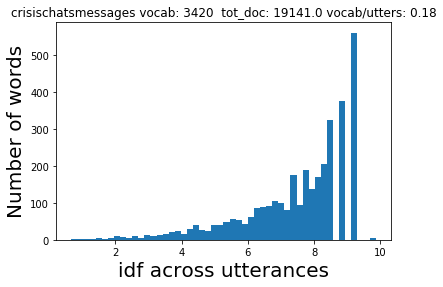

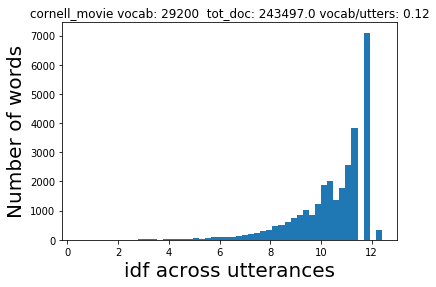

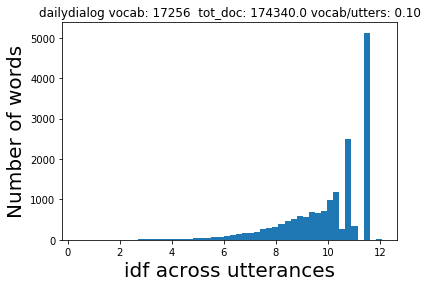

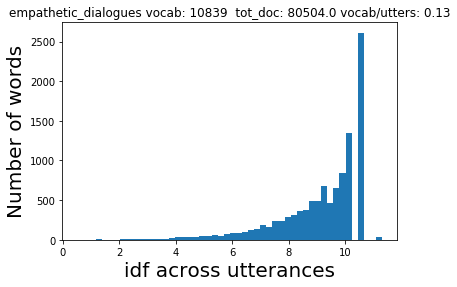

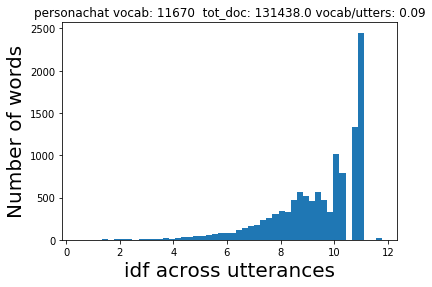

In [130]:
tasks = ['crisischatsmessages', 'cornell_movie', 'dailydialog', 'empathetic_dialogues', 'personachat']
for task in tasks:
    
    tot_doc = open('/data/odemasi/packages/ParlAI/tmp/%s/dict_minfreq_2.tot_doc' % task, 'r').readline()
    tot_doc = float(tot_doc.strip('\n'))
    lines = open('/data/odemasi/packages/ParlAI/tmp/%s/dict_minfreq_2.doc_freq' % task, 'r').readlines()
    doc_freq = [float(x.split('\t')[1].strip('\n')) for x in lines[4:]] # strip off special tokens at front
    
    plt.hist([np.log(tot_doc/x) for x in doc_freq], bins=50)
    plt.title('%s vocab: %s  tot_doc: %s vocab/utters: %.2f' % (task, len(doc_freq), tot_doc, len(doc_freq)/float(tot_doc)))
#     plt.xlim([-1, 11])
    plt.xlabel('idf across utterances', fontsize=20)
    plt.ylabel('Number of words', fontsize=20)
    plt.show()

# Load crowdworker input data

In [22]:
batch_name = 'batches/Batch_3622867_batch_results.csv'

raw_df = pd.read_csv(batch_name)
turk_df = raw_df

In [5]:
raw_df[:3]

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,Answer.rel_3,Answer.rel_4,Answer.rel_5,Answer.rel_6,Answer.rel_7,Answer.rel_8,Answer.rel_9,Answer.rel_warmup,Approve,Reject
0,3UUSLRKAUMNRYILUD069OZX66TLD7T,33V96X0SXRP0GOK7AUJDZXHJQE1Z1Y,"Select the most interesting, relevant, and ove...",Select the most interesting and relevance dial...,"labeling, dialogue",$1.00,Sat Apr 27 10:21:01 PDT 2019,3,BatchId:3622867;OriginalHitTemplateId:928390912;,3600,...,1,1,1,1,1,1,1,1,NaN,NaN
1,3UUSLRKAUMNRYILUD069OZX66TLD7T,33V96X0SXRP0GOK7AUJDZXHJQE1Z1Y,"Select the most interesting, relevant, and ove...",Select the most interesting and relevance dial...,"labeling, dialogue",$1.00,Sat Apr 27 10:21:01 PDT 2019,3,BatchId:3622867;OriginalHitTemplateId:928390912;,3600,...,3,1,1,2,1,2,3,1,NaN,NaN
2,3UUSLRKAUMNRYILUD069OZX66TLD7T,33V96X0SXRP0GOK7AUJDZXHJQE1Z1Y,"Select the most interesting, relevant, and ove...",Select the most interesting and relevance dial...,"labeling, dialogue",$1.00,Sat Apr 27 10:21:01 PDT 2019,3,BatchId:3622867;OriginalHitTemplateId:928390912;,3600,...,3,1,1,2,3,1,2,1,NaN,NaN


In [219]:
list(raw_df.columns)

['HITId',
 'HITTypeId',
 'Title',
 'Description',
 'Keywords',
 'Reward',
 'CreationTime',
 'MaxAssignments',
 'RequesterAnnotation',
 'AssignmentDurationInSeconds',
 'AutoApprovalDelayInSeconds',
 'Expiration',
 'NumberOfSimilarHITs',
 'LifetimeInSeconds',
 'AssignmentId',
 'WorkerId',
 'AssignmentStatus',
 'AcceptTime',
 'SubmitTime',
 'AutoApprovalTime',
 'ApprovalTime',
 'RejectionTime',
 'RequesterFeedback',
 'WorkTimeInSeconds',
 'LifetimeApprovalRate',
 'Last30DaysApprovalRate',
 'Last7DaysApprovalRate',
 'Input.msg1_0',
 'Input.msg2_0',
 'Input.resp_1_0',
 'Input.model_1_0',
 'Input.resp_2_0',
 'Input.model_2_0',
 'Input.resp_3_0',
 'Input.model_3_0',
 'Input.msg1_1',
 'Input.msg2_1',
 'Input.resp_1_1',
 'Input.model_1_1',
 'Input.resp_2_1',
 'Input.model_2_1',
 'Input.resp_3_1',
 'Input.model_3_1',
 'Input.msg1_2',
 'Input.msg2_2',
 'Input.resp_1_2',
 'Input.model_1_2',
 'Input.resp_2_2',
 'Input.model_2_2',
 'Input.resp_3_2',
 'Input.model_3_2',
 'Input.msg1_3',
 'Input.msg2_

In [8]:
raw_df.loc[0,'Input.model_3_0']

'empathetic_dialogues seq2seq idf'

## Look at evaluation of the warmup question: 

In [228]:
for colname in ['Answer.int_warmup', 'Answer.rel_warmup', 
                'Answer.check_int_warmup', 'Answer.check_rel_warmup', 
                'Answer.rank_warmup_1', 'Answer.rank_warmup_2', 'Answer.rank_warmup_3']:
    
    print(colname,'\t', Counter(raw_df[colname]))

Answer.int_warmup 	 Counter({3: 157, 2: 59, 1: 24})
Answer.rel_warmup 	 Counter({1: 223, 2: 11, 3: 6})
Answer.check_int_warmup 	 Counter({nan: 227, 'on': 13})
Answer.check_rel_warmup 	 Counter({nan: 239, 'on': 1})
Answer.rank_warmup_1 	 Counter({1: 207, 2: 25, 3: 8})
Answer.rank_warmup_2 	 Counter({2: 120, 3: 114, 1: 6})
Answer.rank_warmup_3 	 Counter({3.0: 117, 2.0: 95, 1.0: 27, nan: 1})


## Justifications of warmup

In [235]:
print( '\n'.join(raw_df['Answer.Justified Answer'].values))

It just felt right
It sounded natural and had good sentence structure.
Most related
Again, it's the only well-formed, relevant response.
the tennis response was irrelevant but somewhat interesting.
Most related
It just felt right
Because I am a Dallas fan also and I think that is cool.
It makes the most sense.
The response makes sense and has good sentence structure.
direct response to person
It just felt right
The first is the only one that is relevant. The second the sentence structure is poor. The third tennis is mentioned, which just seems weird to me when they were talking about football originally.
It made the most sense of the bunch. Response 3 mentioned an entirely different sport so that was out. Response 2 doesn't make sense grammatically.
by what was offered by the person. it was said that the favorite team was the cowboys. My answer was the one which would directly respond to that comment
It's provides more information and it's just more interesting than just saying that's 

In [240]:
# print( '\n'.join(map(str, raw_df['Answer.rank_warmup_3'].values)))

## Justification of final

In [233]:
print(raw_df['Answer.Justified Answer Final'].values)

['It just felt right'
 'The sentence about cooking was also good but I liked the comic books one better. They both sounded natural.'
 'It answers the question correctly.'
 "It's something someone would actually say in that situation"
 'It made sense in the context.' "It's the most reassuring."
 'It just felt right' 'I thought the other 2 responses made no sense.'
 'It was the only response that made sense.'
 'None seemed very relevant but it kind of makes sure that the chatbot would reassure someone if the person seemed distressed'
 'at least it is slightly related' 'It just felt right'
 "The other two responses did not fit with what was already said. Even the one I chose as the best didn't fit as the bot asked if the person is a millionaire now, and the person responds with no. So asking what happened doesn't really even make sense. Asking about how long makes even less sense though."
 "It was the only one that made sense within the context of person 1's response."
 'I went with that 

## Optional feedback: 

In [234]:
print( raw_df['Answer.optionalfeedback'].values)
#  'A lot of these are non-sensical responses.  It makes it hard to "rank" them'
#  'please define ~~ for future workers.' 
#  'I see you got rid of the "ungrammatical" checkbox. Yeah, that wasn\'t working out too well before. Good decision.'


['{}' '{}' '{}'
 "Some of these repeat questions that are already answered.  I mean, they're relevant to the conversation, technically, but they're kind of not....if that makes sense."
 'Even if you choose none are interesting/relevant, it forces you to choose a bubble.'
 '{}' '{}' 'Very interesting survey. Hope I did it correctly. Thank you.'
 '{}' '{}' '{}' '{}'
 "Most of the response just didn't seem to fit well with what was already said. I tried to do what the instructions said, but it wasn't easy."
 '{}' 'none' '{}' '{}' '{}' 'nice' nan '{}' '{}' '{}' '{}' '{}' '{}' '{}'
 '{}' '{}' 'Nice survey' '{}' '{}' '{}' '{}' 'n' '{}'
 'That was fun, thanks! I hope I did well.' '{}' '{}' 'thanx' '{}' '{}'
 '{}' '{}' '{}' '{}'
 'Thank you for the opportunity to take part in this task.' '{}' '{}' '{}'
 '{}' '{}' '{}' '{}' '{}' '{}' '{}' '{}' '{}' '{}' '{}' '{}'
 'I was not sure if I could pick the most relevant and most interesting for the same response.'
 '{}' '{}' 'Thank you for the opportu

## check warmup question

## Look at justifications

In [20]:
# [type(x) == str for x in raw_df['Answer.check_int_9']]

In [12]:
raw_df[['Answer.check_int_9',
'Answer.check_int_warmup',
'Answer.check_rel_0',
'Answer.int_0',
'Answer.rank_0_1', # example_option
'Answer.rel_0']].loc[0]

Answer.check_int_9         NaN
Answer.check_int_warmup    NaN
Answer.check_rel_0         NaN
Answer.int_0                 2
Answer.rank_0_1              1
Answer.rel_0                 1
Name: 0, dtype: object

# Parse data into convenient data frame

In [197]:

model_order = ['s2s', 'transformer', 'lm']
method_order = ['vanilla', 'idf', 'swapping']
choice_df = []
# grammar_df = []
for i in turk_df.index:
    row = turk_df.loc[i]
    hit_num = i
    worker_id = row['WorkerId']
    for ex in range(10): # given to each turker in a single HIT
        
        option_to_method = {}
        method_to_rank = {}
        method_to_resp = {}
#         method_to_gram = {}
        for option in range(1, 4):
            model_pieces = row['Input.model_%s_%s' % (option, ex)].split(' ')
            if len(model_pieces) == 2: 
                dataset, second = model_pieces
                if second not in ['s2s', 'transformer']:
                    method = second
                    model = 's2s' 
                else: 
                    method = 'vanilla'
                    model = second
            else: 
                dataset, model, method = model_pieces
                
            option_to_method[option] = method
            method_to_rank[method] = row['Answer.rank_%s_%s' % (ex, option)]
            
            method_to_resp[method] = row['Input.resp_%s_%s' % (option, ex)]
#             method_to_gram[method] = np.isnan(row['Answer.gram_%s_%s' % (ex, option)])
            
        most_interesting = option_to_method[row['Answer.int_%s' % (ex,)]]
        most_relevant = option_to_method[row['Answer.rel_%s' % (ex,)]]
        none_int = type(row['Answer.check_int_%s'% (ex,)]) == str
        none_rel = type(row['Answer.check_rel_%s'% (ex,)]) == str
        message1 = row['Input.msg1_%s' % (ex,)]
        message2 = row['Input.msg2_%s' % (ex,)]
        
        
        choice_df.append([hit_num, worker_id, dataset, model, most_interesting, most_relevant, \
                          message1, message2, none_int, none_rel] + \
                         [method_to_rank[m] for m in method_order] + \
                         [method_to_resp[m] for m in method_order]
                        )

choice_df = pd.DataFrame(choice_df, columns = ['hit_num', 'worker_id', 'dataset', 'model', \
                                               'most_int', 'most_rel', \
                                               'message1', 'message2', \
                                               'none_int', 'none_rel']\
                                             + method_order \
                                             + ['resp_%s' % m for m in method_order])

choice_df['context'] = choice_df['message1'] + choice_df['message2']


In [198]:
choice_df[:3]

,hit_num,worker_id,dataset,model,most_int,most_rel,message1,message2,none_int,none_rel,vanilla,idf,swapping,resp_vanilla,resp_idf,resp_swapping,context
0,0,A1PUHCEBSOWETV,empathetic_dialogues,seq2seq,vanilla,swapping,~~,i did something really foolish at the grocery ...,False,False,2,3,1,why ?,oh no :( what happened ?,what did you do ?,~~i did something really foolish at the grocer...
1,0,A1PUHCEBSOWETV,cornell_movie,seq2seq,idf,vanilla,do you have a baby?,no... the closest...,False,False,1,2,3,yes .,i do n't know ...,no ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !...,do you have a baby?no... the closest...
2,0,A1PUHCEBSOWETV,personachat,transformer,idf,vanilla,what can i say ? i am amazing lol,its almost as cool as lord of the rings . have...,False,False,1,2,3,i do not have any kids,that is cool ! what kind of music do you like ?,"no , but i do not watch much tv much tv much t...",what can i say ? i am amazing lolits almost as...


# Summary statistics on all HIT input

In [75]:
print('Most interesting: ', Counter(choice_df['most_int']))
print('Most relevant: ', Counter(choice_df['most_rel']))
print('Percent of examples where int==rel: %.2f%%' % (100.0*np.sum(choice_df['most_int'] == choice_df['most_rel']) \
                                  / float(choice_df['most_rel'].shape[0]),))

print('Fraction of examples where none interesting: %.2f' % choice_df['none_int'].mean())
print('Fraction of examples where none relevant: %.2f' % choice_df['none_rel'].mean())

Most interesting:  Counter({'idf': 849, 'swapping': 847, 'vanilla': 704})
Most relevant:  Counter({'vanilla': 961, 'swapping': 756, 'idf': 683})
Percent of examples where int==rel: 24.58%
Fraction of examples where none interesting: 0.14
Fraction of examples where none relevant: 0.08


# Consider times model gets a rank (consider all input individually)
If a method gets a majority of rank 1 votes (for best message overall), it's usually vanilla. Idf and swapping split places 2 and 3

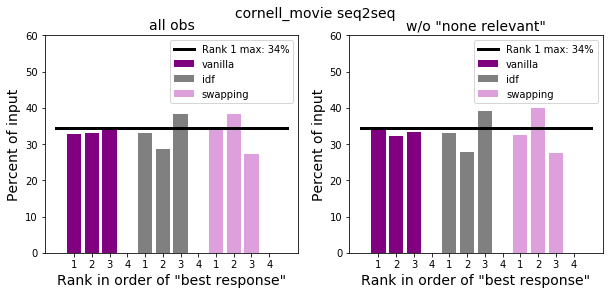

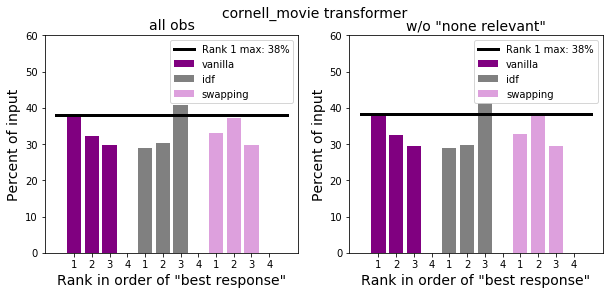

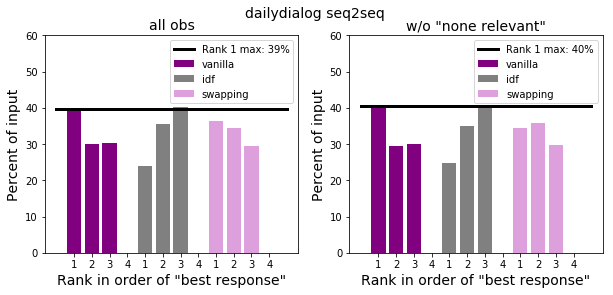

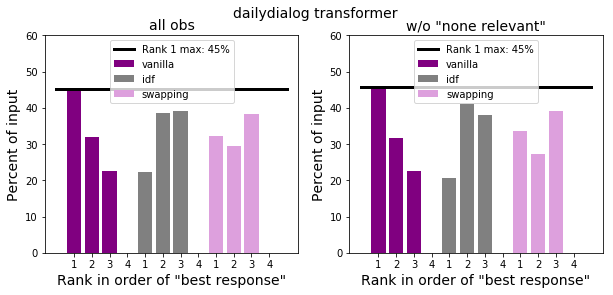

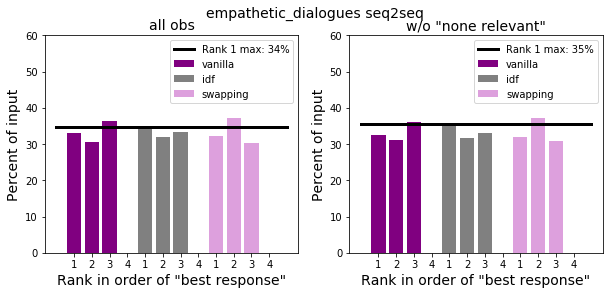

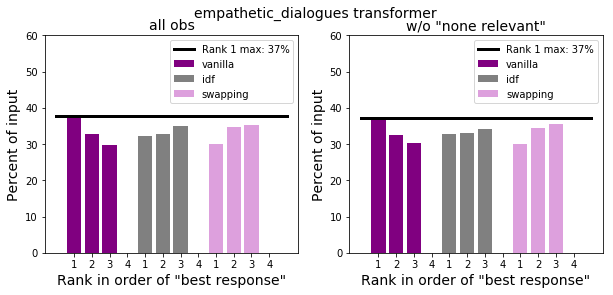

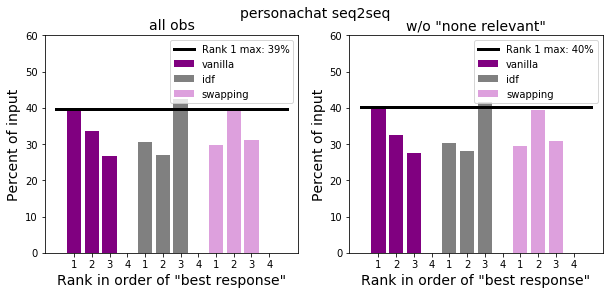

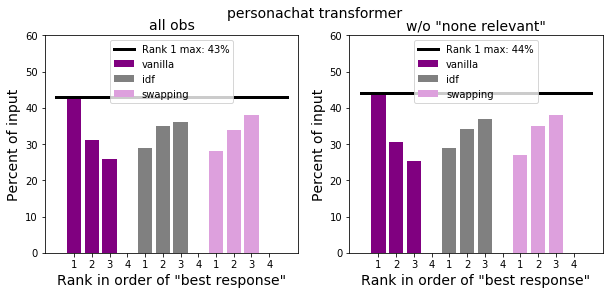

In [214]:
colors = ['purple', 'grey', 'plum']


for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    some_relevant = ~setting_df['none_rel']
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    for name, df in [('all obs', setting_df), 
                    ('w/o "none relevant"', setting_df[some_relevant])]:

        N = float(df.shape[0])
        
        if name == 'all obs':
            use_ax = ax[0]
        else: 
            use_ax = ax[1]
            
        method_max = 0
        for m, method in enumerate(method_order):
            
            for r in range(3):
                perc_rank = 100.*np.sum(df[method] == (r+1))/N

                if r == 0:
                    method_max = np.max((method_max, perc_rank))
                    use_ax.bar(m*4+r, perc_rank, color=colors[m], label=method)
                else:
                    use_ax.bar(m*4+r, perc_rank, color=colors[m])
        
        use_ax.set_xticks(np.arange(12))
        use_ax.set_xticklabels(1+np.mod(np.arange(12),4))
        use_ax.plot([-1,12], [method_max, method_max],'k', linewidth=3, label='Rank 1 max: %d%%'%method_max)
        use_ax.legend()
        use_ax.set_ylim([0, 60])
        use_ax.set_title(name, fontsize=14)
        use_ax.set_ylabel('Percent of input', fontsize=14)
        use_ax.set_xlabel('Rank in order of "best response"', fontsize=14)
    
    plt.suptitle('%s %s' % (dataset, model), fontsize=14)
    plt.show()
        

# Considering only examples that get a majority of "best" rank

If we only consider examples where an method is ranked # 1 best overall, we see vanilla win and unclear difference between idf and swapping. 


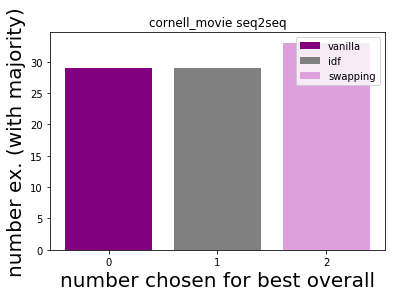

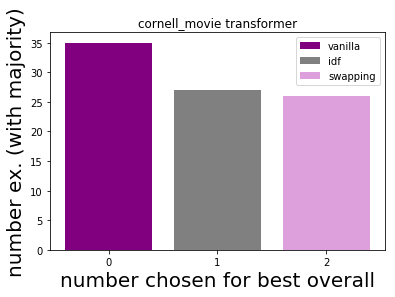

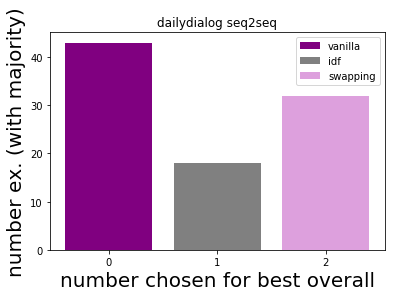

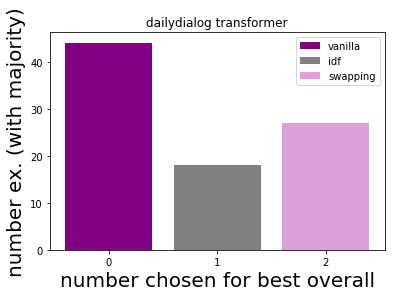

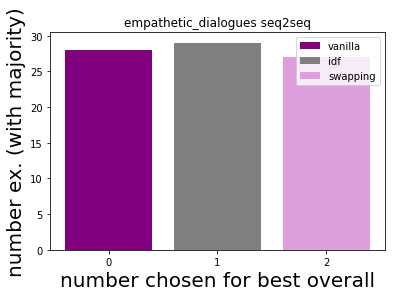

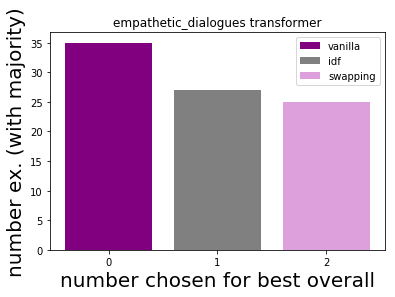

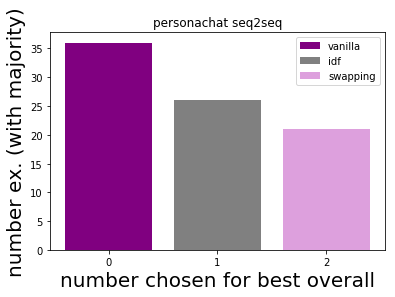

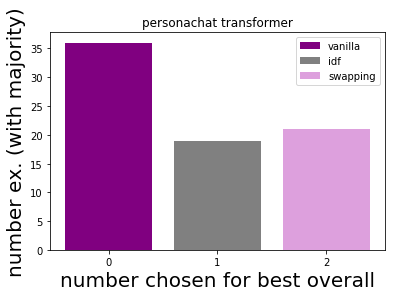

In [216]:
colors = ['purple', 'grey', 'plum']

for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    best_choice = []
    for context, df in setting_df.groupby('context'):
        
        rank_votes = (df[['vanilla', 'idf', 'swapping']] == 1).sum()
        if rank_votes.max() >= 2:
            best_choice.append(rank_votes[rank_votes == rank_votes.max()].index[0])
            
    c = Counter(best_choice)
    for i in range(len(method_order)):
        plt.bar(i, c[method_order[i]], label=method_order[i], color=colors[i])
        
    plt.xticks(np.arange(3))
    plt.legend(loc='best')
    plt.xlabel('number chosen for best overall', fontsize=20)
    plt.ylabel('number ex. (with majority)', fontsize=20)
    plt.title('%s %s' % (dataset, model))
    plt.show()
    

# Worker agreement on interestingness & relevance
There is considerable disagreement amoung workers, but it varies between datasets. 

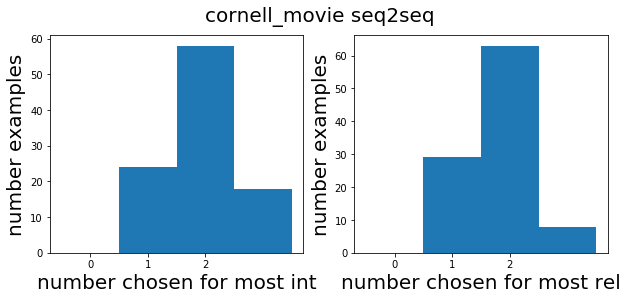

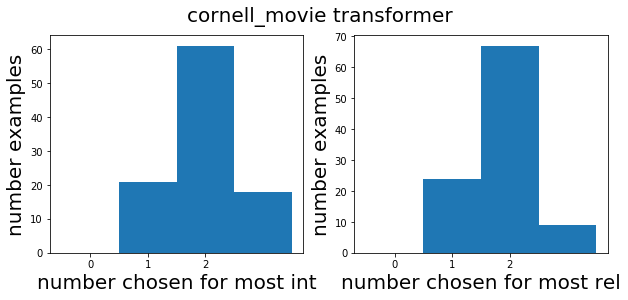

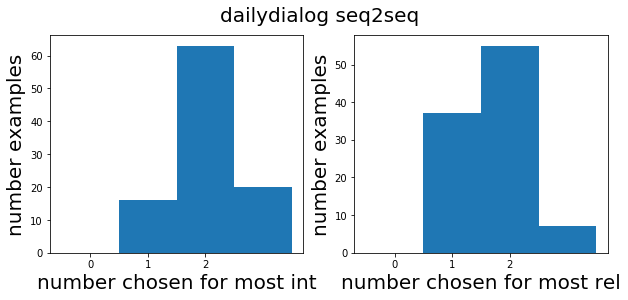

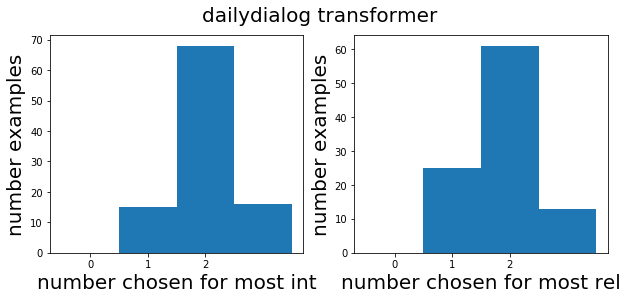

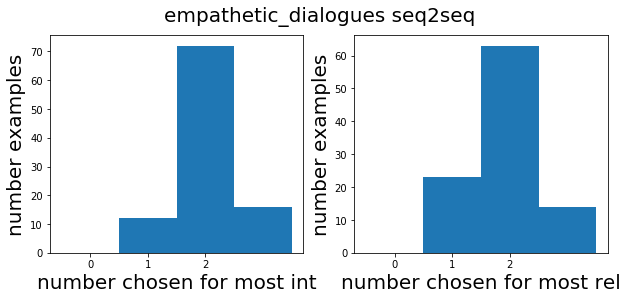

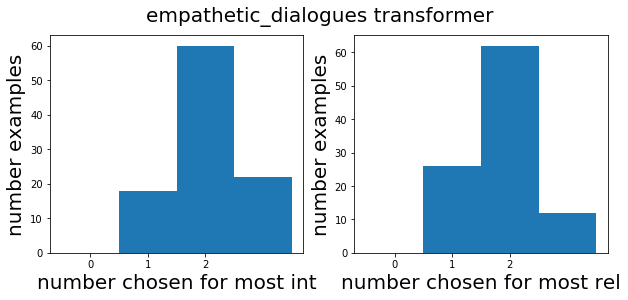

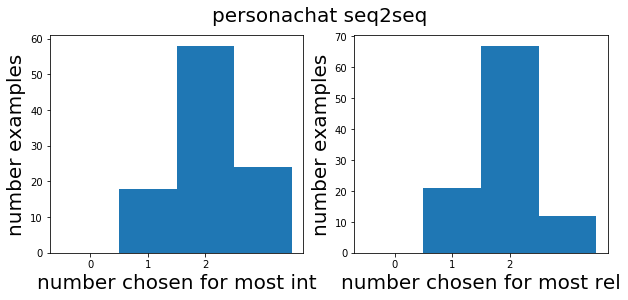

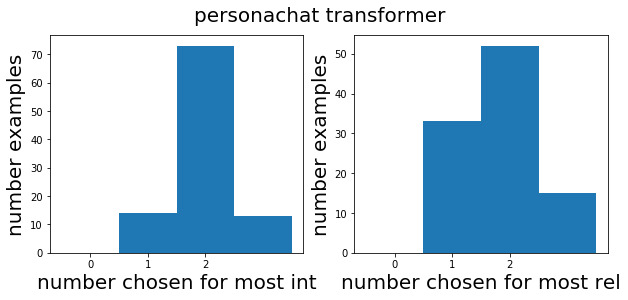

In [142]:
for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    
    num_most_int = []
    num_most_rel = []
    for context, df in setting_df.groupby('context'):
        num_most_int.append(len(df['most_int'].unique()))
        num_most_rel.append(len(df['most_rel'].unique()))

    ax[0].hist(num_most_int, bins=np.arange(5)-.5)
    ax[0].set_xticks(np.arange(3))
    ax[0].set_xlabel('number chosen for most int', fontsize=20)
    ax[0].set_ylabel('number examples', fontsize=20)
#     ax[0].set_title('%s %s' % (dataset, model), fontsize=20)
#     plt.show()

    ax[1].hist(num_most_rel, bins=np.arange(5)-.5)
    ax[1].set_xlabel('number chosen for most rel', fontsize=20)
    ax[1].set_ylabel('number examples', fontsize=20)
#     ax[1].set_title('%s %s' % (dataset, model), fontsize=20)
    ax[1].set_xticks(np.arange(3))
    plt.suptitle('%s %s' % (dataset, model), fontsize=20)
    plt.show()

# Look at how often a method is chosen for most relevant/interesting. 

cornell_movie seq2seq


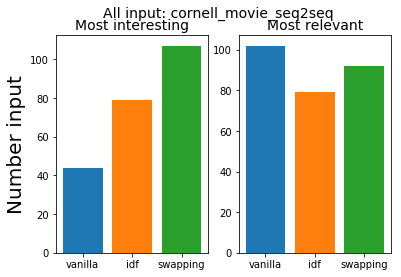

cornell_movie transformer


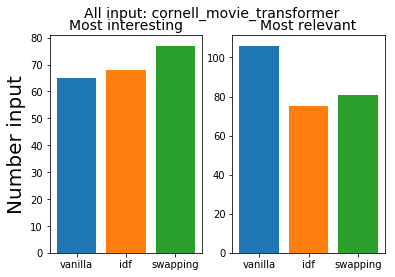

dailydialog seq2seq


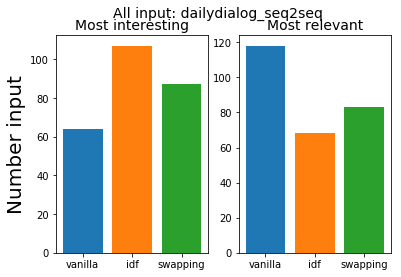

dailydialog transformer


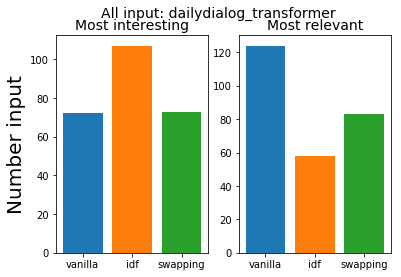

empathetic_dialogues seq2seq


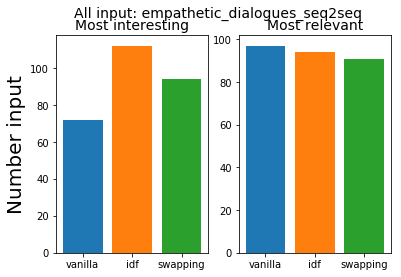

empathetic_dialogues transformer


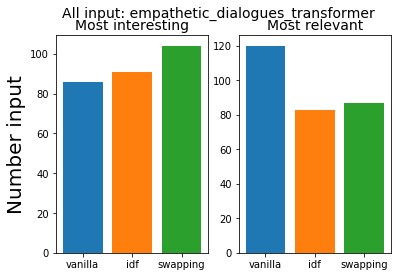

personachat seq2seq


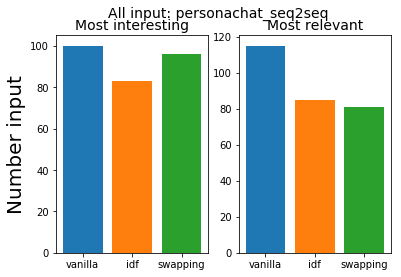

personachat transformer


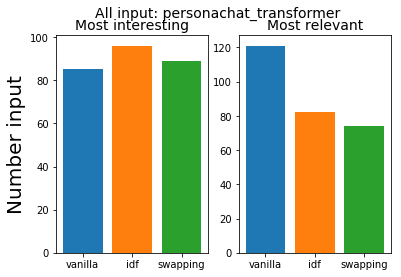

In [212]:
for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    some_int = (~setting_df['none_int'])
    some_rel = (~setting_df['none_rel']) 
    
    int_df = setting_df[some_int]
    rel_df = setting_df[some_rel]
    
    
    print(dataset, model)
    print('=========')
    data_model_key = '%s_%s' % (dataset, model)
    
    fig, ax = plt.subplots(1, 2)
    for m, method in enumerate(method_order): 
        ax[0].bar(m, np.sum(int_df['most_int'] == method))
        ax[1].bar(m, np.sum(rel_df['most_rel'] == method))
    
    
    ax[0].set_xticks(np.arange(3))
    ax[0].set_xticklabels(method_order)
    ax[0].set_title('Most interesting', fontsize=14)
    ax[0].set_ylabel('Number input', fontsize=20)
#     ax[0].set_title('%s %s' % (dataset, model), fontsize=20)
#     plt.show()

    ax[1].set_title('Most relevant', fontsize=14)
#     ax[1].set_ylabel('Number examples', fontsize=20)
#     ax[1].set_title('%s %s' % (dataset, model), fontsize=20)
    ax[1].set_xticks(np.arange(3))
    ax[1].set_xticklabels(method_order)
    
    
#     cross_mat = np.NaN * np.zeros((len(method_order), len(method_order)))
#     for i, m1 in enumerate(method_order):
#         for j, m2 in enumerate(method_order):
#             cross_mat[i,j] = np.sum((df['most_int'] == m1) & (df['most_rel'] == m2))
            
#     plt.pcolor(cross_mat, vmin=0, vmax=50)
#     plt.xticks(.5 + np.arange(len(method_order)), method_order)
#     plt.yticks(.5 + np.arange(len(method_order)), method_order)
#     plt.xlabel('Selected as most relevant')
#     plt.ylabel('Selected as most interesting')
#     plt.colorbar(label='Number of examples')
#     ind = np.arange(len(method_order))
    plt.suptitle('All input: %s' % (data_model_key, ), fontsize=14)
    plt.show()

## Exclude example without worker majority. 

cornell_movie seq2seq


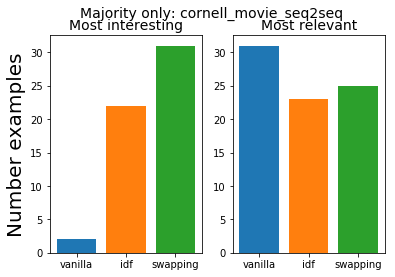

cornell_movie transformer


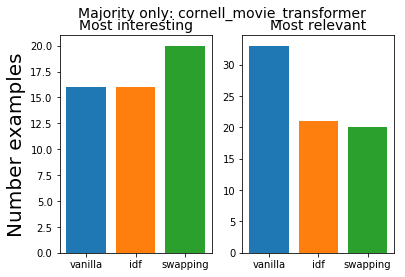

dailydialog seq2seq


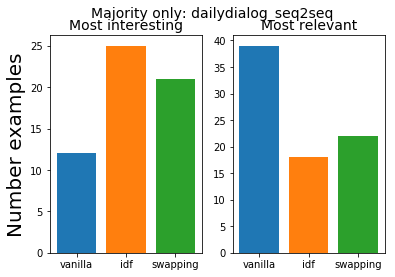

dailydialog transformer


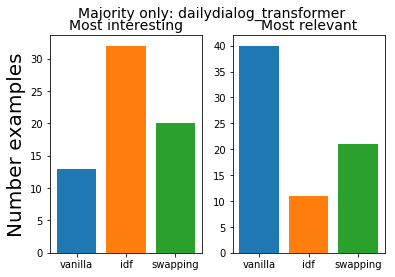

empathetic_dialogues seq2seq


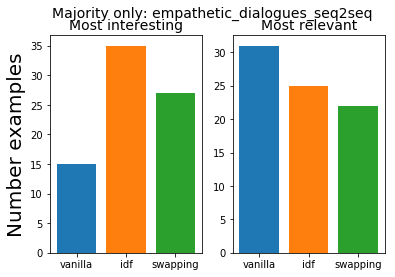

empathetic_dialogues transformer


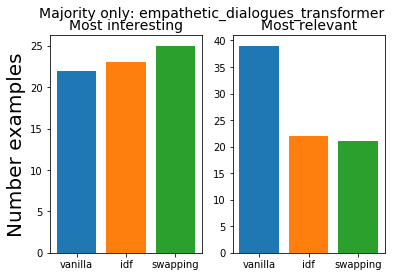

personachat seq2seq


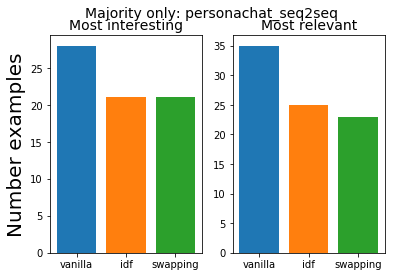

personachat transformer


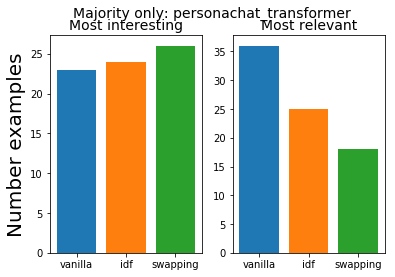

In [210]:
for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    some_int = (~setting_df['none_int'])
    some_rel = (~setting_df['none_rel']) 
    
    int_df = setting_df[some_int]
    rel_df = setting_df[some_rel]
    
    rel_counts = np.zeros(len(method_order))
    int_counts = np.zeros(len(method_order))
    
    for context, ex_df in rel_df.groupby('context'):
        c = Counter(ex_df['most_rel'])
        if c.most_common(1)[0][1] > 1:
            rel_counts[method_order.index(c.most_common(1)[0][0])] += 1
            
    for context, ex_df in int_df.groupby('context'):
        c = Counter(ex_df['most_int'])
        if c.most_common(1)[0][1] > 1:
            int_counts[method_order.index(c.most_common(1)[0][0])] += 1
            
            
    
    print(dataset, model)
    print('=========')
    data_model_key = '%s_%s' % (dataset, model)
    
    fig, ax = plt.subplots(1, 2)
    for m, method in enumerate(method_order): 
        ax[0].bar(m, int_counts[m])
        ax[1].bar(m, rel_counts[m])
     
    ax[0].set_xticks(np.arange(3))
    ax[0].set_xticklabels(method_order)
    ax[0].set_title('Most interesting', fontsize=14)
    ax[0].set_ylabel('Number examples', fontsize=20)

    ax[1].set_title('Most relevant', fontsize=14)
    ax[1].set_xticks(np.arange(3))
    ax[1].set_xticklabels(method_order)
    
    plt.suptitle('Majority only: %s' % (data_model_key,), fontsize=14)
    plt.show()

# Relationship of best and most relevant

In [298]:
print('Percent inputs where most relevant response also chosen as best')
print('(not grouped by example, but "none relevant" removed)')
      
for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    some_rel = (~setting_df['none_rel'])
    df = setting_df[some_rel]
    
    
    print('=========')
    print(dataset, model)

    data_model_key = '%s_%s' % (dataset, model)
    
    cor_mat = np.zeros((1, len(method_order)))
    for ind in df.index:
        most_rel_method = df.loc[ind, 'most_rel']
        j = method_order.index(most_rel_method)
        cor_mat[0, j] += df.loc[ind, most_rel_method] == 1 # ranked best overall. 
    
    print('\t\t %.2f' %(100.0*np.sum(cor_mat)/df.shape[0],))
#     plt.pcolor(cor_mat/df.shape[0], vmin=0, vmax=50)
#     plt.xticks(.5 + np.arange(len(method_order)), method_order)
# #     plt.yticks(.5 + np.arange(len(method_order)), method_order)
#     plt.xlabel('Selected as most relevant')
# #     plt.ylabel('Selected as most interesting')
#     plt.colorbar(label='Percent most relevant and mos i')
#     ind = np.arange(len(method_order))
#     plt.title('%s: Most int==most rel: %d%%' % (data_model_key, 100.0*np.sum(cross_mat[ind,ind])/np.sum(cross_mat)))
#     plt.show()

Percent inputs where most relevant response also chosen as best
(not grouped by example, but "none relevant" removed)
cornell_movie seq2seq
		 90.11
cornell_movie transformer
		 88.93
dailydialog seq2seq
		 87.73
dailydialog transformer
		 89.81
empathetic_dialogues seq2seq
		 89.01
empathetic_dialogues transformer
		 89.66
personachat seq2seq
		 91.10
personachat transformer
		 91.70


# Relationship of when interested and when relevant
There is little consistent relationship across datasets/models, but all have the most interesting match the most relevant < 25% of the time.

cornell_movie seq2seq


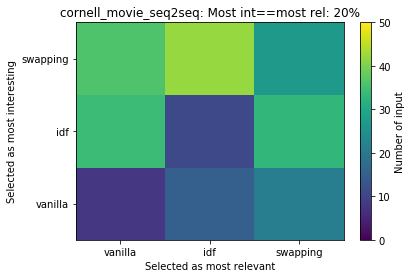

cornell_movie transformer


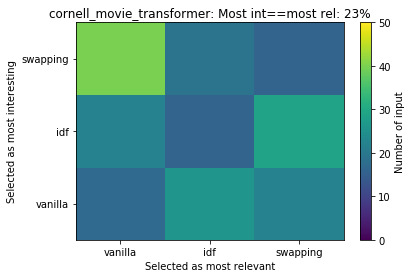

dailydialog seq2seq


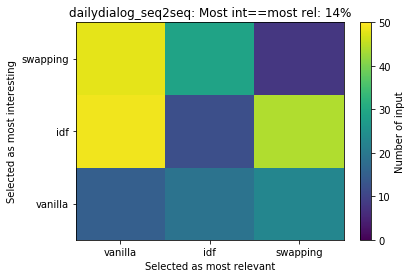

dailydialog transformer


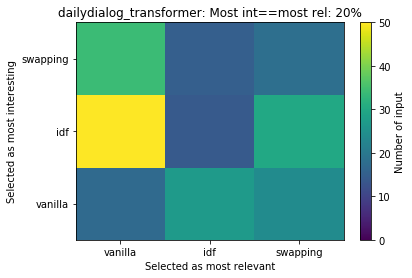

empathetic_dialogues seq2seq


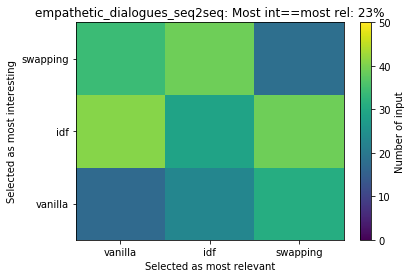

empathetic_dialogues transformer


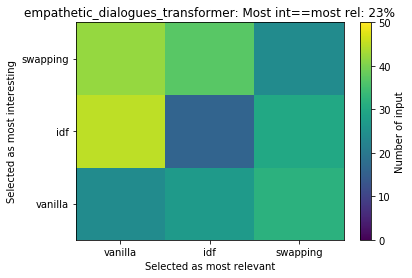

personachat seq2seq


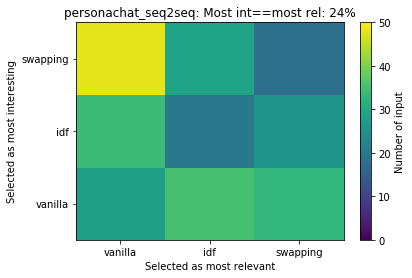

personachat transformer


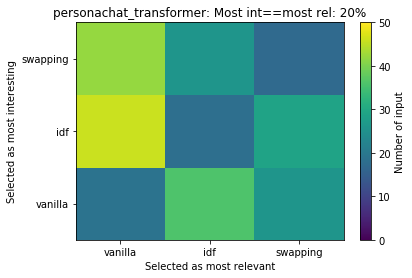

In [213]:
for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    some_int_relevant = (~setting_df['none_rel']) & (~setting_df['none_int'])
    df = setting_df[some_int_relevant]
    
    
    print(dataset, model)
    print('=========')
    data_model_key = '%s_%s' % (dataset, model)
    
    cross_mat = np.NaN * np.zeros((len(method_order), len(method_order)))
    for i, m1 in enumerate(method_order):
        for j, m2 in enumerate(method_order):
            cross_mat[i,j] = np.sum((df['most_int'] == m1) & (df['most_rel'] == m2))
            
    plt.pcolor(cross_mat, vmin=0, vmax=50)
    plt.xticks(.5 + np.arange(len(method_order)), method_order)
    plt.yticks(.5 + np.arange(len(method_order)), method_order)
    plt.xlabel('Selected as most relevant')
    plt.ylabel('Selected as most interesting')
    plt.colorbar(label='Number of input')
    ind = np.arange(len(method_order))
    plt.title('%s: Most int==most rel: %d%%' % (data_model_key, 100.0*np.sum(cross_mat[ind,ind])/np.sum(cross_mat)))
    plt.show()

In [259]:
method_order

['vanilla', 'idf', 'swapping']

In [264]:
# choice_df.columns
# task, method, model
choice_df['model'].unique()

array(['seq2seq', 'transformer'], dtype=object)

## Look at distributions of idf generated
We could run tests for distribution shifts, but everything is pretty overlapping, so I'd expect p-values to be very large. 

In [283]:
tasks = ['cornell_movie', 'dailydialog', 'empathetic_dialogues', 'personachat']


### Build dictionaries of idf for each dataset.
idf_dict = {t:{} for t in tasks}
for task in tasks:
    
    tot_doc = open('/data/odemasi/packages/ParlAI/tmp/%s/dict_minfreq_2.tot_doc' % task, 'r').readline()
    tot_doc = float(tot_doc.strip('\n'))
    lines = open('/data/odemasi/packages/ParlAI/tmp/%s/dict_minfreq_2.doc_freq' % task, 'r').readlines()
    
    # build idf dictionary for dataset: 
    for line in lines[4:]:
        tok, ct = line.split('\t')
        idf_dict[task][tok] = np.log(tot_doc/float(ct.strip('\n')))
    
    

### Look at distribution of generated idf for each model/dataset. 

bin_edges = np.arange(0,13,.2)
generated_idf_dist = {t:{m:{} for m in ['seq2seq', 'transformer']} for t in tasks}

for (task, model), df in choice_df.groupby(['dataset', 'model']):
    
    generated_idf_dist[task][model] = np.zeros((len(method_order), len(bin_edges)-1))
    missing_toks = []
    
    for m, method in enumerate(method_order):
        responses = df['resp_%s'%method].values
        idfs_generated = []
        for resp in responses:
            for tok in resp.split(' '):
                try:
                    idfs_generated += [idf_dict[task][tok],]
                except KeyError:
                    missing_toks += [tok,]
        
        generated_idf_dist[task][model][m,:], _ = np.histogram(idfs_generated, bins=bin_edges)
    print('Missing tokens: ', missing_toks)


Missing tokens:  ['@$%#', '@$%#', '@$%#']
Missing tokens:  ['@!%#', '@!%#', '@!%#', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '@%!@', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '$@#!', '!#!%', '!#!%', '!#!%']
Missing tokens:  []
Missing tokens:  ['#$!%ens', '#$!%ens', '#$!%ens']
Missing tokens:  ['', '', '', '', '', '', '', '', '']
Missing tokens:  ['', '', '']
Missing tokens:  []
Missing tokens:  []


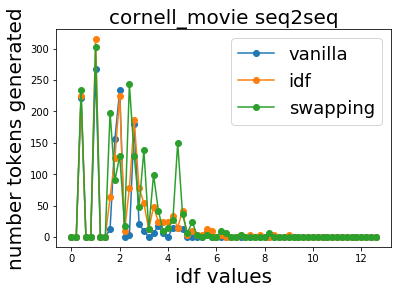

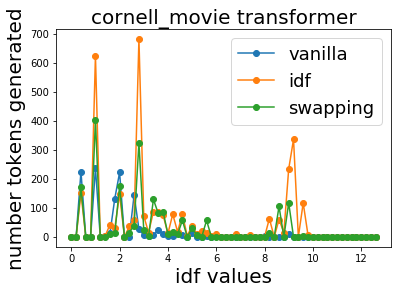

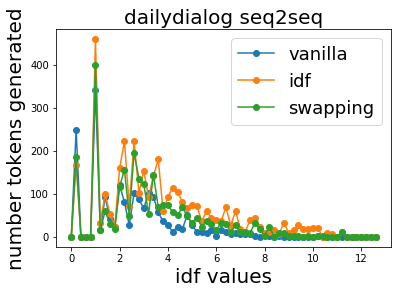

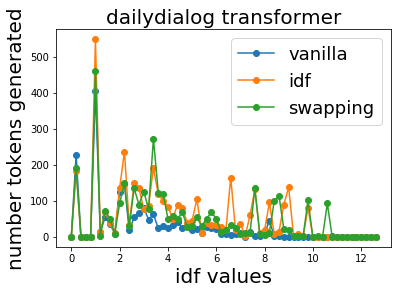

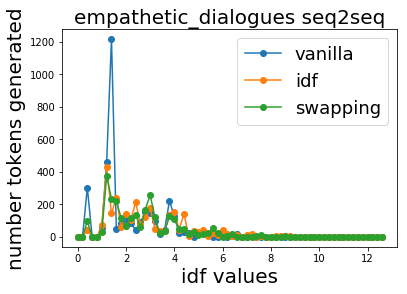

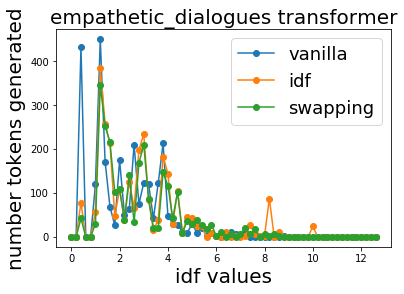

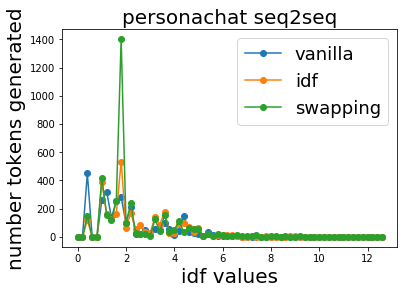

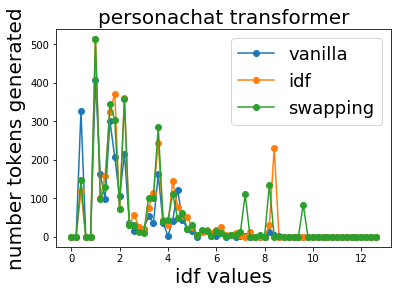

In [284]:
for task in tasks:
    for model in choice_df['model'].unique():
        for m, method in enumerate(method_order):
            plt.plot(bin_edges[:-1], generated_idf_dist[task][model][m,:], '-o', label=method)

        plt.title('%s %s' % (task, model), fontsize=20)  
        plt.ylabel('number tokens generated', fontsize=20)  
        plt.legend(fontsize=18)
        plt.xlabel('idf values', fontsize=20)  
        plt.show()


# Load relevance data

In [299]:
elim_batch_name = 'batches/Batch_3629231_batch_results.csv'

raw_elim_df = pd.read_csv(elim_batch_name)

In [332]:
# raw_elim_df['Input.model_1_3']

In [333]:

elim_df = []
for i in raw_elim_df.index:
    row = raw_elim_df.loc[i]
    hit_num = i
    worker_id = row['WorkerId']
    
    for ex in range(10): # given to each turker in a single HIT
        
        model_pieces = row['Input.model_1_%s' % (ex,)].split(' ')
        dataset, model, method = model_pieces
        
        well_formed_score = row['Answer.well_formed_%s' % (ex,)] 
        not_rel = type(row['Answer.check_rel_0_%s' % (ex,)]) == str
        
        message1 = row['Input.msg1_%s' % (ex,)]
        message2 = row['Input.msg2_%s' % (ex,)]
        response = row['Input.resp_1_%s' % (ex,)]
        
        
        elim_df.append([hit_num, worker_id, dataset, model, method, \
                          message1, message2, response, not_rel, well_formed_score])

elim_df = pd.DataFrame(elim_df, columns = ['hit_num', 'worker_id', 'dataset', 'model', 'method', \
                                               'message1', 'message2', 'response', 'not_rel', 'well_score'])

elim_df['context'] = elim_df['message1'] + elim_df['message2']


## Variability on warmup question: 

Warmup response:  Cool is football
Fraction flagged not-relevant: 0.00
Mean well-formed score:  2.6857142857142855


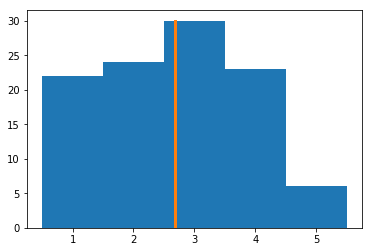

Warmup response:  That's cool!
Fraction flagged not-relevant: 0.00
Mean well-formed score:  4.76595744680851


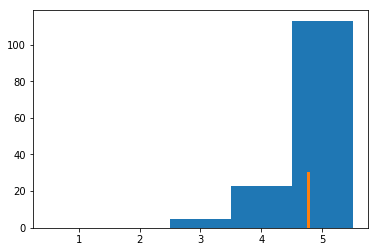

Warmup response:  Yes, I played tennis last week! It was so much fun.
Fraction flagged not-relevant: 0.65
Mean well-formed score:  4.313725490196078


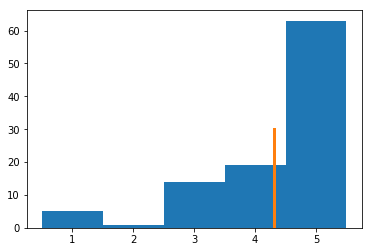

Warmup response:  Yes, football football football football football.
Fraction flagged not-relevant: 0.02
Mean well-formed score:  2.0454545454545454


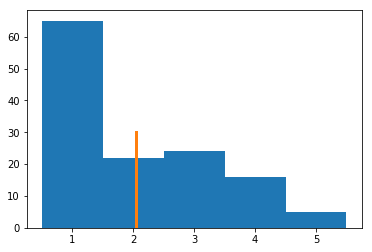

In [334]:
for warmup_resp, df in raw_elim_df.groupby('Input.warmup_response'):
    mean_score = df['Answer.well_formed_warmup'].mean()
    print('Warmup response: ', warmup_resp)
    print('Fraction flagged not-relevant: %.2f' % np.mean([type(x) == str for x in df['Answer.check_rel_1_warmup'].values]))
    print('Mean well-formed score: ', mean_score)
    plt.hist(df['Answer.well_formed_warmup'].values, bins = .5+np.arange(6))
    plt.plot([mean_score, mean_score], [0, 30], linewidth=3)
    plt.show()

In [335]:
raw_elim_df['Answer.optionalfeedback'].values

array(['{}', '{}', '{}', '{}', 'no comments', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       "for the 4th chat (Chatbot Response: excuse me , can you tell me where my name is liu wei ?), there is missing text where the Person 1's response should be, so I had no way of determining if chatbot response was relevant or not.",
       '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}',
       '{}', '{}', '{}', '{}', '{}',
       'I think relevancy should be on a scale as well as the comprehension, certain examples s

In [336]:
elim_df[:3]

,hit_num,worker_id,dataset,model,method,message1,message2,response,not_rel,well_score,context
0,0,A1PUHCEBSOWETV,personachat,seq2seq,vanilla,i am in the army,oh sounds like fun but very demanding .,what do you do for a living ?,False,2,i am in the armyoh sounds like fun but very de...
1,0,A1PUHCEBSOWETV,cornell_movie,seq2seq,vanilla,~~,we've got such sights to show you --,"oh , no !",False,2,~~we've got such sights to show you --
2,0,A1PUHCEBSOWETV,cornell_movie,seq2seq,swapping,~~,back up.,i 'm sorry .,False,4,~~back up.


In [348]:
for (task, model), df in elim_df.groupby(['dataset', 'model']):
    print(task, model)
    for method, method_df in df.groupby('method'):
        perc_not_rel = 100.*method_df['not_rel'].mean()
        well_score = method_df['well_score'].mean()
        well_std = method_df['well_score'].std()
        print('\t percent not relevant: %.2f \tmean well-formed score (std): %.3f (%.3f)\t %s' % (perc_not_rel, well_score, well_std, method))
        
        

cornell_movie seq2seq
	 percent not relevant: 24.33 	mean well-formed score (std): 3.957 (1.214)	 face
	 percent not relevant: 30.00 	mean well-formed score (std): 3.923 (1.164)	 idf
	 percent not relevant: 27.67 	mean well-formed score (std): 3.927 (1.183)	 swapping
	 percent not relevant: 21.00 	mean well-formed score (std): 4.143 (1.020)	 vanilla
dailydialog seq2seq
	 percent not relevant: 40.00 	mean well-formed score (std): 3.350 (1.407)	 face
	 percent not relevant: 30.00 	mean well-formed score (std): 3.593 (1.307)	 idf
	 percent not relevant: 26.00 	mean well-formed score (std): 3.900 (1.214)	 swapping
	 percent not relevant: 17.67 	mean well-formed score (std): 4.063 (1.069)	 vanilla
empathetic seq2seq
	 percent not relevant: 28.00 	mean well-formed score (std): 3.113 (1.445)	 face
empathetic_dialogues seq2seq
	 percent not relevant: 27.33 	mean well-formed score (std): 4.083 (1.108)	 idf
	 percent not relevant: 20.33 	mean well-formed score (std): 4.247 (0.978)	 swapping
	 pe

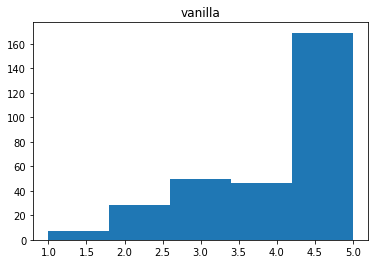

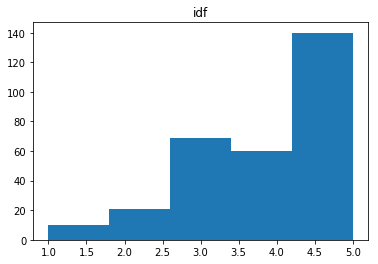

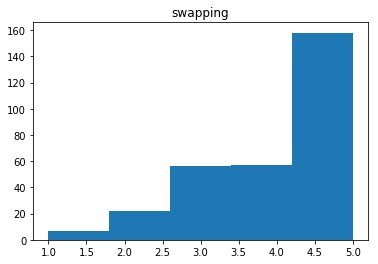

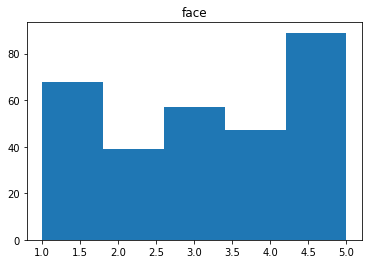

In [344]:
for method in df['method'].unique():
    plt.hist(df.groupby('method').get_group(method)['well_score'].values, bins = 5)
    plt.title(method)
    plt.show()
    

In [346]:
# method_df['well_score'].std()